# Tony Ding's Lab2
USC ID#:8961530140

(a) Download the Combined Cycle Power Plant data from: https://archive.ics.uci.edu/ml/datasets/Combined+Cycle+Power+Plant

# (b)(i)


In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from astropy.table import Table
from statsmodels.stats.outliers_influence import OLSInfluence
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from math import sqrt

In [2]:
df=pd.read_excel('../data/Folds5x2_pp.xlsx')
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [3]:
df.shape

(9568, 5)

There are a total of 9568 rows and 5 columns in this data set. 

Columns represent features, namely hourly average ambient variables Temperature (AT), Ambient Pressure (AP), Relative Humidity (RH), and Exhaust Vacuum (V), as well as the continuous output that we want to predict, namely the net hourly electrical energy output (PE) of the plant. 

And rows represent different instances of such features and output.

# (b)(ii)

One method for displaying pairwise scatterplot between all the dependent variables and the independent variable:

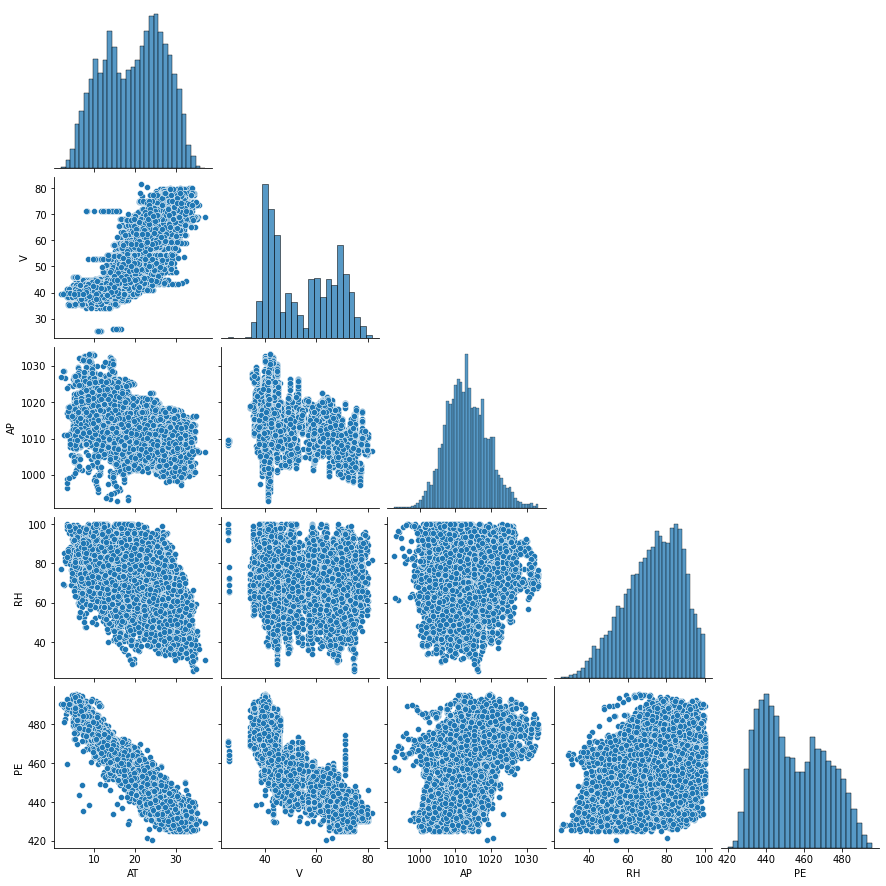

In [4]:
sns.pairplot(data=df,corner=True)

Here's another method by using pairwise scatterplots subplots to demonstrate the relationship between independent variables and dependent variables:

(I know that this is not technically a pairwise scatterplots, but I just tried this for better visualization; if you are looking for the right pairplot for grading purpose, refer to the previous one above.)

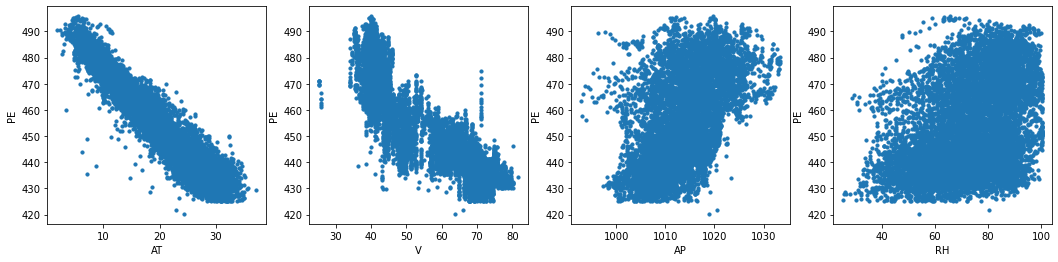

In [5]:
plt.figure(figsize=(18,4))

plt.subplot(1,4,1)
plt.scatter(df['AT'], df['PE'],s=10)
plt.ylabel('PE')
plt.xlabel('AT')

plt.subplot(1,4,2)
plt.scatter(df['V'], df['PE'],s=10)
plt.ylabel('PE')
plt.xlabel('V')

plt.subplot(1,4,3)
plt.scatter(df['AP'], df['PE'],s=10)
plt.ylabel('PE')
plt.xlabel('AP')

plt.subplot(1,4,4)
plt.scatter(df['RH'], df['PE'],s=10)
plt.ylabel('PE')
plt.xlabel('RH')

plt.show()

According to the above pairwise scatterplots of all the independent variables with dependent variables, there seems to be a strong negative correlation between AT and PE and also a relatively strong negative correlation between V and PE. There also seems to be a slightly positive correlation between AP and PE, and also a seemingly positive correlation between and RH and PE.

# (b)(iii)

In [6]:
Variable_names=['AT','V','AP','RH','PE']

mean_all=[]
for i in range(0,5,1):
    mean=df.iloc[:,i].mean()
    mean_all.append(format(mean,'.4f'))

median_all=[]
for i in range(0,5,1):
    median=df.iloc[:,i].median()
    median_all.append(format(median,'.4f'))

range_all=[]
for i in range(0,5,1):
    max_num=df.iloc[:,i].max()
    min_num=df.iloc[:,i].min()    
    range_all.append(format(max_num-min_num,'.4f'))

q25_all=[]
for i in range(0,5,1):
    q25 = np.percentile(df.iloc[:,i], 25)
    q25_all.append(format(q25,'.4f'))    

q75_all=[]
for i in range(0,5,1):
    q75 = np.percentile(df.iloc[:,i], 75)
    q75_all.append(format(q75,'.4f'))
    
iqr_all=[]
for i in range(0,5,1):
    q75, q25 = np.percentile(df.iloc[:,i], [75 ,25])
    iqr = q75 - q25
    iqr_all.append(format(iqr,'.4f'))


t=Table([Variable_names,mean_all,median_all,range_all,q25_all,q75_all,iqr_all],
        names=('Variable Names','Mean','Median','Range','First Quartile','Third Quartile','Interquartile Ranage'))
t


Variable Names,Mean,Median,Range,First Quartile,Third Quartile,Interquartile Ranage
str2,str9,str9,str7,str9,str9,str7
AT,19.6512,20.3450,35.3000,13.5100,25.7200,12.2100
V,54.3058,52.0800,56.2000,41.7400,66.5400,24.8000
AP,1013.2591,1012.9400,40.4100,1009.1000,1017.2600,8.1600
RH,73.3090,74.9750,74.6000,63.3275,84.8300,21.5025
PE,454.3650,451.5500,75.5000,439.7500,468.4300,28.6800


Above is the table that contains the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset.



# (c)

For each predictor, fit a simple linear regression model to predict the response.
Describe your results. In which of the models is there a statistically significant
association between the predictor and the response? Create some plots to back
up your assertions. Are there any outliers that you would like to remove from
your data for each of these regression tasks? 

In [7]:
train_x_AT = df['AT'].copy()
train_x_AT =sm.add_constant(train_x_AT,prepend=False)

slr_AT = sm.OLS(df['PE'],train_x_AT).fit()
print(slr_AT.summary())
print(slr_AT.params)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:01:48   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -2.1713      0.007   -291.715      0.0

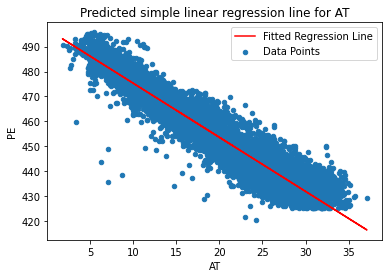

In [8]:
slr_AT_pred=slr_AT.predict(train_x_AT)

plt.title("Predicted simple linear regression line for AT")
plt.scatter(df["AT"],df["PE"],label='Data Points',s=20)
plt.plot(df["AT"],slr_AT_pred,color='red',label="Fitted Regression Line")
plt.ylabel("PE")
plt.xlabel("AT")
plt.legend()
plt.show()

The simple linear regression line function that we have fitted for AT and PE is: y = -2.17132x + 497.03412

And since the P value is 0.000 for variable AT, we can say that there's a statistically significant association between the predictor: AT and the response: PE.

In addition, the plot also demonstrates a good evidence that AT is a statistically significant predicotr for PE.

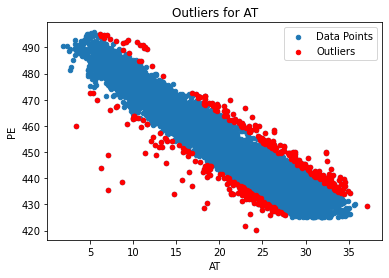

In [9]:
studentized_res_AT = OLSInfluence(slr_AT).get_resid_studentized_external()
outliers_AT=[]
for index,value in studentized_res_AT.items():
    if value >2 or value < -2:
        outliers_AT.append(index)
outliers_AT_DF=df[df.index.isin(outliers_AT)]

plt.title("Outliers for AT")
plt.scatter(df["AT"],df["PE"],label='Data Points',s=20)
plt.scatter(outliers_AT_DF["AT"],outliers_AT_DF["PE"],color='red',label="Outliers",s=20)
plt.ylabel("PE")
plt.xlabel("AT")
plt.legend()
plt.show()

Since we have many data points in our data set, we can set the studentized residuls between 2 and -2 instead of 3 and -3 and still have a decent number of data points left.

By setting the studentized residuls between 2 and -2 to pick out outliers that are not within this range, I have plotted all the outlier data points for AT under this criterion, and they are marked in red in the above figure and should probably be removed. 

In [10]:
train_x_V = df['V'].copy()
train_x_V =sm.add_constant(train_x_V,prepend=False)

slr_V = sm.OLS(df['PE'],train_x_V).fit()
print(slr_V.summary())
print(slr_V.params)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:01:49   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
V             -1.1681      0.007   -172.402      0.0

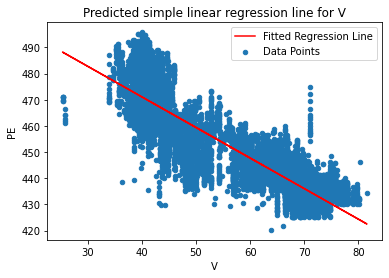

In [11]:
slr_V_pred=slr_V.predict(train_x_V)

plt.title("Predicted simple linear regression line for V")
plt.scatter(df["V"],df["PE"],label='Data Points',s=20)
plt.plot(df["V"],slr_V_pred,color='red',label="Fitted Regression Line")
plt.ylabel("PE")
plt.xlabel("V")
plt.legend()
plt.show()

The simple linear regression line function that we have fitted for V and PE is: y = -1.168135x + 517.801526

And since the P value is 0.000 for variable V, we can say that there's a statistically significant association between the predictor: V and the response: PE.

In addition, the plot also demonstrates a good evidence that V is a statistically significant predicotr for PE.

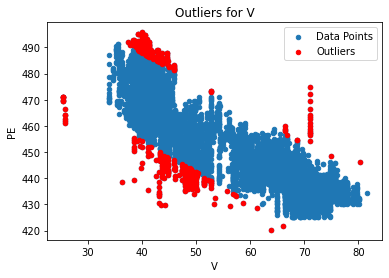

In [12]:
studentized_res_V = OLSInfluence(slr_V).get_resid_studentized_external()
outliers_V=[]
for index,value in studentized_res_V.items():
    if value >2 or value < -2:
        outliers_V.append(index)
outliers_V_DF=df[df.index.isin(outliers_V)]

plt.title("Outliers for V")
plt.scatter(df["V"],df["PE"],label='Data Points',s=20)
plt.scatter(outliers_V_DF["V"],outliers_V_DF["PE"],color='red',label="Outliers",s=20)
plt.ylabel("PE")
plt.xlabel("V")
plt.legend()
plt.show()

Since we have many data points in our data set, we can set the studentized residuls between 2 and -2 instead of 3 and -3 and still have a decent number of data points left.

By setting the studentized residuls between 2 and -2 to pick out outliers that are not within this range, I have plotted all the outlier data points for V under this criterion, and they are marked in red in the above figure and should probably be removed. 

In [13]:
train_x_AP = df['AP'].copy()
train_x_AP =sm.add_constant(train_x_AP,prepend=False)

slr_AP = sm.OLS(df['PE'],train_x_AP).fit()
print(slr_AP.summary())
print(slr_AP.params)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:01:49   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AP             1.4899      0.025     59.296      0.0

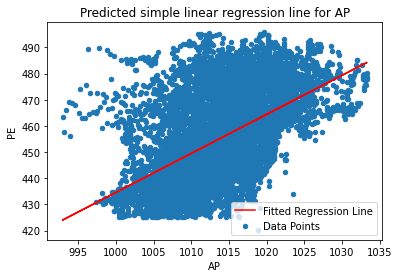

In [14]:
slr_AP_pred=slr_AP.predict(train_x_AP)

plt.title("Predicted simple linear regression line for AP")
plt.scatter(df["AP"],df["PE"],label='Data Points',s=20)
plt.plot(df["AP"],slr_AP_pred,color='red',label="Fitted Regression Line")
plt.ylabel("PE")
plt.xlabel("AP")
plt.legend()
plt.show()

The simple linear regression line function that we have fitted for AP and PE is: y = 1.489872x - 1055.260989

And since the P value is 0.000 for variable AP, we can say that there's a statistically significant association between the predictor: AP and the response: PE.

In addition, the plot also demonstrates a good evidence that AP is a statistically significant predicotr for PE.

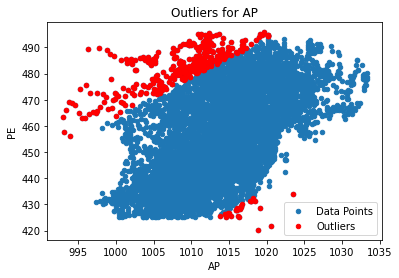

In [15]:
studentized_res_AP = OLSInfluence(slr_AP).get_resid_studentized_external()
outliers_AP=[]
for index,value in studentized_res_AP.items():
    if value >2 or value < -2:
        outliers_AP.append(index)
outliers_AP_DF=df[df.index.isin(outliers_AP)]

plt.title("Outliers for AP")
plt.scatter(df["AP"],df["PE"],label='Data Points',s=20)
plt.scatter(outliers_AP_DF["AP"],outliers_AP_DF["PE"],color='red',label="Outliers",s=20)
plt.ylabel("PE")
plt.xlabel("AP")
plt.legend()
plt.show()

Since we have many data points in our data set, we can set the studentized residuls between 2 and -2 instead of 3 and -3 and still have a decent number of data points left.

By setting the studentized residuls between 2 and -2 to pick out outliers that are not within this range, I have plotted all the outlier data points for AP under this criterion, and they are marked in red in the above figure and should probably be removed. 

In [16]:
train_x_RH = df['RH'].copy()
train_x_RH =sm.add_constant(train_x_RH,prepend=False)

slr_RH = sm.OLS(df['PE'],train_x_RH).fit()
print(slr_RH.summary())
print(slr_RH.params)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:01:50   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RH             0.4557      0.011     41.399      0.0

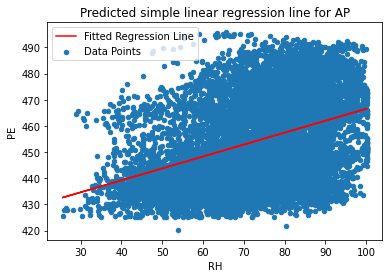

In [17]:
slr_RH_pred=slr_RH.predict(train_x_RH)

plt.title("Predicted simple linear regression line for AP")
plt.scatter(df["RH"],df["PE"],label='Data Points',s=20)
plt.plot(df["RH"],slr_RH_pred,color='red',label="Fitted Regression Line")
plt.ylabel("PE")
plt.xlabel("RH")
plt.legend()
plt.show()

The simple linear regression line function that we have fitted for RH and PE is: y = 0.455650x + 420.961766

And since the P value is 0.000 for variable RH, we can say that there's a statistically significant association between the predictor: RH and the response: PE.

In addition, the plot also demonstrates a good evidence that RH is a statistically significant predicotr for PE.

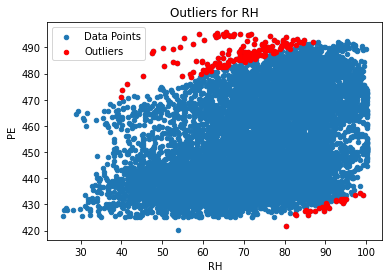

In [18]:
studentized_res_RH = OLSInfluence(slr_RH).get_resid_studentized_external()
outliers_RH=[]
for index,value in studentized_res_RH.items():
    if value >2 or value < -2:
        outliers_RH.append(index)
outliers_RH_DF=df[df.index.isin(outliers_RH)]

plt.title("Outliers for RH")
plt.scatter(df["RH"],df["PE"],label='Data Points',s=20)
plt.scatter(outliers_RH_DF["RH"],outliers_RH_DF["PE"],color='red',label="Outliers",s=20)
plt.ylabel("PE")
plt.xlabel("RH")
plt.legend()
plt.show()

Since we have many data points in our data set, we can set the studentized residuls between 2 and -2 instead of 3 and -3 and still have a decent number of data points left.

By setting the studentized residuls between 2 and -2 to pick out outliers that are not within this range, I have plotted all the outlier data points for RH under this criterion, and they are marked in red in the above figure and should probably be removed. 

# (d)

Fit a multiple regression model to predict the response using all of the predictors.
Describe your results. For which predictors can we reject the null hypothesis
H0 : βj = 0? 

In [19]:
train_x_all = df[['AT','V','AP','RH']].copy()
train_x_all = sm.add_constant(train_x_all, prepend=False)

slr_all = sm.OLS(df['PE'],train_x_all).fit()
print(slr_all.summary())
print(slr_all.params)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:01:51   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -1.9775      0.015   -129.342      0.0

The results show that all four of the predictors have statistically significant association with the response variable PE given that all of their P values are 0.000. 

Hence, for all four predictors, namely (AT, V, AP, RH), we can reject the null hypothesis H0 : βj = 0 

# (e)

How do your results from 1c compare to your results from 1d? Create a plot
displaying the univariate regression coefficients from 1c on the x-axis, and the
multiple regression coefficients from 1d on the y-axis. That is, each predictor is
displayed as a single point in the plot. Its coefficient in a simple linear regression
model is shown on the x-axis, and its coefficient estimate in the multiple linear
regression model is shown on the y-axis.

(-2.5, 2.0)

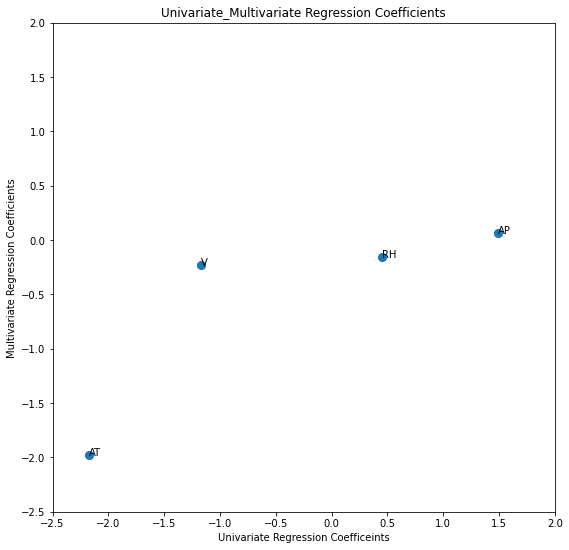

In [20]:
AT_param=slr_AT.params['AT']
V_param=slr_V.params['V']
AP_param=slr_AP.params['AP']
RH_param=slr_RH.params['RH']
coef_uni= [AT_param,V_param,AP_param,RH_param]

coef_multi=[slr_all.params[0],slr_all.params[1],slr_all.params[2],slr_all.params[3]]

plt.figure(figsize = (9, 9))
plt.scatter(coef_uni, coef_multi, marker = 'o', s = 66)
plt.title('Univariate_Multivariate Regression Coefficients')
plt.xlabel('Univariate Regression Coefficeints')
plt.ylabel('Multivariate Regression Coefficients')
plt.annotate("AT", (AT_param, slr_all.params[0]))
plt.annotate("V", (V_param, slr_all.params[1]))
plt.annotate("AP", (AP_param, slr_all.params[2]))
plt.annotate("RH", (RH_param, slr_all.params[3]))
plt.xlim(-2.5, 2)
plt.ylim(-2.5, 2)


# (f)

Is there evidence of nonlinear association between any of the predictors and the
response? To answer this question, for each predictor X, fit a model of the form:
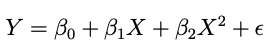

In [21]:
train_x_AT_poly = df['AT'].copy().to_numpy().reshape(-1,1)
poly_train_AT = PolynomialFeatures(degree=2).fit_transform(train_x_AT_poly)
poly_slr_AT = sm.OLS(df['PE'],poly_train_AT).fit()
print(poly_slr_AT.summary())
print(poly_slr_AT.params)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.907
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                 4.674e+04
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:01:51   Log-Likelihood:                -29350.
No. Observations:                9568   AIC:                         5.871e+04
Df Residuals:                    9565   BIC:                         5.873e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        505.9504      0.341   1484.226      0.0

The fitted nonlinear regression line for AT is: y = 505.950401 - 3.270152x + 0.0287$x^{2}$

In [22]:
train_x_V_poly = df['V'].copy().to_numpy().reshape(-1,1)
poly_train_V = PolynomialFeatures(degree=2).fit_transform(train_x_V_poly)
poly_slr_V = sm.OLS(df['PE'],poly_train_V).fit()
print(poly_slr_V.summary())
print(poly_slr_V.params)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.646e+04
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:01:51   Log-Likelihood:                -33588.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9565   BIC:                         6.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        576.0875      2.118    271.972      0.0

The fitted nonlinear regression line for V is: y = 576.087466 - 3.382967x + 0.019929$x^{2}$

In [23]:
train_x_AP_poly = df['AP'].copy().to_numpy().reshape(-1,1)
poly_train_AP = PolynomialFeatures(degree=2).fit_transform(train_x_AP_poly)
poly_slr_AP = sm.OLS(df['PE'],poly_train_AP).fit()
print(poly_slr_AP.summary())
print(poly_slr_AP.params)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1815.
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:01:51   Log-Likelihood:                -39183.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.839e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.676e+04   3045.711      8.788      0.0

The fitted nonlinear regression line for AP is: y = 26764.81837 - 53.381445x + 0.027056$x^{2}$

In [24]:
train_x_RH_poly = df['RH'].copy().to_numpy().reshape(-1,1)
poly_train_RH = PolynomialFeatures(degree=2).fit_transform(train_x_RH_poly)
poly_slr_RH = sm.OLS(df['PE'],poly_train_RH).fit()
print(poly_slr_RH.summary())
print(poly_slr_RH.params)

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     857.7
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:01:51   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9565   BIC:                         7.989e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.7197      3.138    135.359      0.0

The fitted nonlinear regression line for RH is: y = 424.719739 - 0.343434x + 0.0008$x^{2}$

As a result, there is indeed evidence of nonlinear association between the response and the predictors such as AT, V, and AP, given that all of their P-Values are very small (<0.05) and are actually listed as 0.000. The predictor RH does not seem to be a significant one for the response in this case given that it has a P-value of 0.215, which is larger than 0.05.

# (g)

Is there evidence of association of interactions of predictors with the response? To
answer this question, run a full linear regression model with all pairwise interaction
terms and state whether any interaction terms are statistically significant. 

In [25]:
# Getting pairwise interaction terms
X_ATV = df['AT'].mul(df['V']).rename("AT_V")
X_ATAP = df['AT'].mul(df['AP']).rename("AT_AP")
X_ATRH = df['AT'].mul(df['RH']).rename("AT_RH")
X_VAP = df['V'].mul(df['AP']).rename("V_AP")
X_VRH = df['V'].mul(df['RH']).rename("V_RH")
X_APRH = df['AP'].mul(df['RH']).rename("AP_RH")


In [26]:
df_interaction = df

for i in [X_ATV, X_ATAP, X_ATRH,X_VAP,X_VRH,X_APRH]:
    df_interaction = pd.concat([df_interaction, i], axis = 1)
df_interaction = df_interaction.drop(['PE'], axis = 1)

df_interaction =sm.add_constant(df_interaction,prepend=False)

slr_interaction = sm.OLS(df['PE'],df_interaction).fit()
print(slr_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Sat, 27 Feb 2021   Prob (F-statistic):               0.00
Time:                        05:01:51   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
AT            -4.3470      2.373     -1.832      0.0

Consequently, there exists evidence of association of interactions of predictors with the response because there are pairwise interaction terms who have very small P values. 

To be more specific, the interaction term AT_V, AT_RH, V_AP, AP_RH all have a P value of less than 0.05, which indicates that these interaction terms are statistically significant.

# (h)

KNN Regression

In [27]:
#X-axis: 1/K (multiplicative inverse of K)
k_inverse = []
for i in range(1, 101,1):
    k_inverse.append(1/i)

In [28]:
#Normalizing the data using Normalizer from sklearn.preprocessing
df_norm = Normalizer().fit_transform(df[['AT','V','AP','RH']])

x_train_norm, x_test_norm, y_train_norm, y_test_norm = train_test_split(df_norm,df['PE'],test_size=0.30,random_state=42)

trainerror_norm=[]
for i in range(1,101,1):
    knn_norm = KNeighborsRegressor(n_neighbors=i,n_jobs=-1)
    knn_norm.fit(x_train_norm,y_train_norm)
    train_pred = knn_norm.predict(x_train_norm)
    error = sqrt(mean_squared_error(y_train_norm,train_pred))
    trainerror_norm.append(error)
   

Text(0, 0.5, 'Root Mean Squared Error')

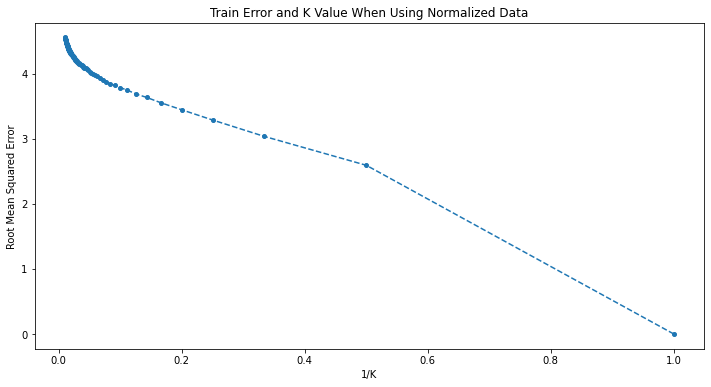

In [29]:
plt.figure(figsize = (12, 6))
plt.plot(k_inverse, trainerror_norm, linestyle = 'dashed', marker = 'o', markersize = 4)
plt.title('Train Error and K Value When Using Normalized Data')
plt.xlabel('1/K')
plt.ylabel('Root Mean Squared Error')


In [30]:
testerror_norm=[]
for i in range(1,101,1):
    knn_norm = KNeighborsRegressor(n_neighbors=i,n_jobs=-1)
    knn_norm.fit(x_train_norm,y_train_norm)
    test_pred = knn_norm.predict(x_test_norm)
    error = sqrt(mean_squared_error(y_test_norm,test_pred))
    testerror_norm.append(error)


Text(0, 0.5, 'Root Mean Squared Error')

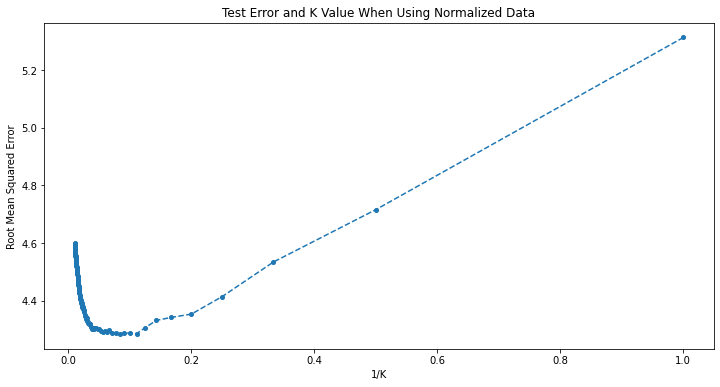

In [31]:
plt.figure(figsize = (12, 6))
plt.plot(k_inverse, testerror_norm, linestyle = 'dashed', marker = 'o', markersize = 4)
plt.title('Test Error and K Value When Using Normalized Data')
plt.xlabel('1/K')
plt.ylabel('Root Mean Squared Error')


In [32]:
best_k_norm = testerror_norm.index(min(testerror_norm)) + 1
print("The best K is",best_k_norm)
print("The best test error when using normalized data, which is when K ="
      ,best_k_norm,", is",testerror_norm[best_k_norm-1])

The best K is 12
The best test error when using normalized data, which is when K = 12 , is 4.284126279864984


Hence, the best K that gives the best fit when using normalized data is when K = 12.

In [33]:
x_train_raw, x_test_raw, y_train_raw, y_test_raw = train_test_split(df[['AT','V','AP','RH']],df['PE'],test_size=0.30,random_state=42)

trainerror_raw=[]
for i in range(1,101,1):
    knn_raw = KNeighborsRegressor(n_neighbors=i,n_jobs=-1)
    knn_raw.fit(x_train_raw,y_train_raw)
    train_pred_raw = knn_raw.predict(x_train_raw)
    error_raw_train = sqrt(mean_squared_error(y_train_raw,train_pred_raw))
    trainerror_raw.append(error_raw_train)
    

Text(0, 0.5, 'Root Mean Squared Error')

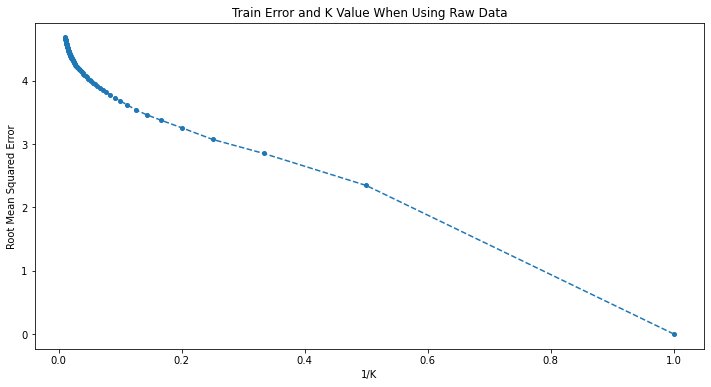

In [34]:
plt.figure(figsize = (12, 6))
plt.plot(k_inverse, trainerror_raw, linestyle = 'dashed', marker = 'o', markersize = 4)
plt.title('Train Error and K Value When Using Raw Data')
plt.xlabel('1/K')
plt.ylabel('Root Mean Squared Error')


In [35]:
testerror_raw=[]
for i in range(1,101,1):
    knn_raw = KNeighborsRegressor(n_neighbors=i,n_jobs=-1)
    knn_raw.fit(x_train_raw,y_train_raw)
    test_pred_raw = knn_raw.predict(x_test_raw)
    error_raw_test = sqrt(mean_squared_error(y_test_raw,test_pred_raw))
    testerror_raw.append(error_raw_test)


Text(0, 0.5, 'Root Mean Squared Error')

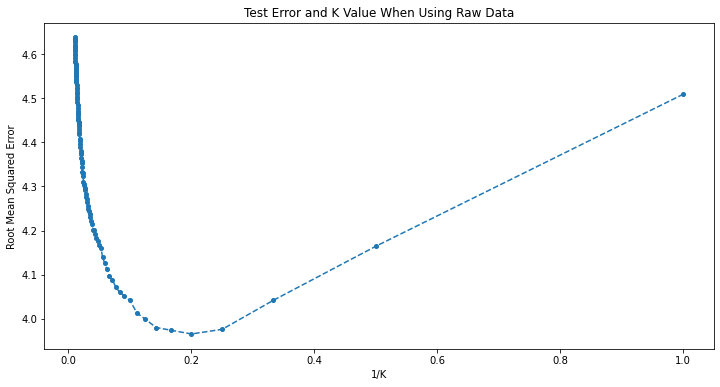

In [36]:
plt.figure(figsize = (12, 6))
plt.plot(k_inverse, testerror_raw, linestyle = 'dashed', marker = 'o', markersize = 4)
plt.title('Test Error and K Value When Using Raw Data')
plt.xlabel('1/K')
plt.ylabel('Root Mean Squared Error')


In [37]:
best_k_raw = testerror_raw.index(min(testerror_raw)) + 1
print("The best K is",best_k_raw)
print("The best test error when using raw data, which is when K ="
      ,best_k_raw,", is",testerror_raw[best_k_raw-1])

The best K is 5
The best test error when using raw data, which is when K = 5 , is 3.9657054659371225


Hence, the best K that gives the best fit when using raw data is when K = 5.

# References:

1:https://stackoverflow.com/questions/23228244/how-do-you-find-the-iqr-in-numpy

2.Discussion 4 Recording: https://usc.zoom.us/rec/share/refRQQro4yJAK0_OzCZ9Yk26d-bNpPDqavtA93qkiNri07kxDmFjNxIKjKGcaXwE.API2foIvpf8ABrmF